# Instalando as bibliotecas

In [16]:
!pip install imageio
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Definindo as funções

In [17]:
# Gustavo Lelli Guirao				NUSP: 11918182
# SCC0251 - Image Processing and Analysis (1º/2024)
# Assigment 2 - Fourier Transform and Filtering
###################################################

import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import math

def low_pass_filter(P, Q, kernel_size: int) -> np.ndarray:
    # Create a low-pass filter mask with the same dimensions as the image
	mask = np.zeros((P, Q), dtype=np.uint8)
	Y, X = np.ogrid[:P, :Q]
	mask_area = (X - (P/2))**2 + (Y - (Q/2))**2 <= kernel_size**2
	mask[mask_area] = 1

	return mask

def high_pass_filter(P, Q, kernel_size: int) -> np.ndarray:
    # Create a high-pass filter mask with the same dimensions as the image
	mask = np.ones((P, Q), dtype=np.uint8)
	Y, X = np.ogrid[:P, :Q]
	mask_area = (X - (P/2))**2 + (Y - (Q/2))**2 <= kernel_size**2
	mask[mask_area] = 0

	return mask

def band_pass_filter(P, Q, kernel_size1, kernel_size2: int) -> np.ndarray:
    # Create a band-pass filter mask with the same dimensions as the image
	mask = np.ones((P, Q), dtype=np.uint8)
	Y, X = np.ogrid[:P, :Q]

	mask_area1 = (X - (P/2))**2 + (Y - (Q/2))**2 <= kernel_size1**2
	mask[mask_area1] = 0
	
	mask_area2 = (X - (P/2))**2 + (Y - (Q/2))**2 <= kernel_size2**2
	mask[mask_area2] = 1

	return mask

def laplacian_high_pass_filter(P, Q) -> np.ndarray:
    # Create a laplacian high-pass filter mask with the same dimensions as the image
	Y, X = np.ogrid[:P, :Q]
	mask = -4 * (math.pi**2) * ((X - (P/2))**2 + (Y - (Q/2))**2)

	return mask

def gaussian_low_pass_filter(P, Q, ro1, ro2) -> np.ndarray:
    # Create a gaussian low-pass filter mask with the same dimensions as the image
	Y, X = np.ogrid[:P, :Q]
	mask = np.exp(-((((X - (P/2))**2) / (2 * (ro1**2))) + ((Y - (Q/2))**2) / (2 * (ro2**2))))

	return mask

# Root Mean Squared Error
def RMSE(reference_image, filtered_image):
    result = 0
    n, m = filtered_image.shape

    for i in range(n):
        for j in range(m):
            result += ((reference_image[i][j] - filtered_image[i][j]) ** 2)
    rmse = math.sqrt(result / (n * m))
    
    return rmse

0.5773006705550153


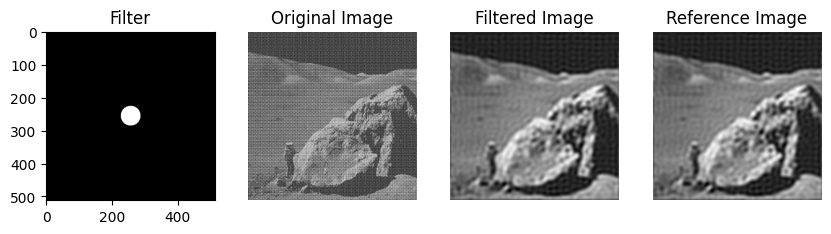

In [19]:
input_image = input().strip()
reference_image = input().strip()
index = int(input())

# Load an example image (you can replace this with your own image)
image = imageio.imread("test_cases_data/" + input_image)
reference_image = imageio.imread("test_cases_reference/" + reference_image)

f_image = np.fft.fft2(image)
f_shifted = np.fft.fftshift(f_image)

P, Q = f_shifted.shape

if(index == 3):
	mask = laplacian_high_pass_filter(P, Q)
else:
	param = int(input())
	if(index == 0):
		mask = low_pass_filter(P, Q, param)
	elif(index == 1):
		mask = high_pass_filter(P, Q, param)
	else:
		param2 = int(input())
		if(index == 2):
			mask = band_pass_filter(P, Q, param, param2)
		else:
			mask = gaussian_low_pass_filter(P, Q, param, param2)
	
# Apply the filter mask to the frequency domain representation of the image
f_filtered = f_shifted * mask

# Use the inverse FFT to transform the filtered image back to the spatial domain
f_ishifted = np.fft.ifftshift(f_filtered)
img_back = np.fft.ifft2(f_ishifted)

# Take the magnitude to get real values
img_filtered = img_back.real
img_filtered = (img_filtered-np.min(img_filtered)) * (255/(np.max(img_filtered)-np.min(img_filtered)))

imageio.imwrite('output.png', img_filtered.astype(np.uint8))

print(RMSE(reference_image, img_filtered))

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(141)
plt.imshow(mask, cmap="gray")
plt.title('Filter')
plt.subplot(142)
plt.imshow(image, cmap="gray")
plt.title('Original Image')
plt.axis('off')
plt.subplot(143)
plt.imshow(img_filtered, cmap="gray")
plt.title('Filtered Image')
plt.axis('off')
plt.subplot(144)
plt.imshow(reference_image, cmap="gray")
plt.title('Reference Image')
plt.axis('off')
plt.show()